In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
def state_creation_circuit(index,qubits):
    if index == 1:
        state_create=QuantumCircuit(qubits)
    elif index ==2:
        state_create=QuantumCircuit(qubits)
        state_create.x(0)
    elif index == 3:
        state_create=QuantumCircuit(qubits)
        state_create.x(qubits)
        state_create.x(0)
    elif index == 4:
        state_create=QuantumCircuit(qubits)
        for i in range(qubits):
            state_create.x(i)
    return state_create

In [3]:
w3=state_creation_circuit(1,3)
w3.ry(-1.23096,0)
w3.x(1)
w3.x(2)
w3.cx(0,1)
w3.ry(np.pi/4,0)
w3.cx(1,0)
w3.ry(-1*np.pi/4,0)
w3.x(0)
w3.x(1)
w3.cx(0,2)
w3.cx(1,2)
w3.draw()

┌────────────┐     ┌──────────┐┌───┐┌───────────┐┌───┐          
q_0: |0>┤ Ry(-1.231) ├──■──┤ Ry(pi/4) ├┤ X ├┤ Ry(-pi/4) ├┤ X ├──■───────
        └───┬───┬────┘┌─┴─┐└──────────┘└─┬─┘└───┬───┬───┘└───┘  │       
q_1: |0>────┤ X ├─────┤ X ├──────────────■──────┤ X ├───────────┼────■──
            ├───┤     └───┘                     └───┘         ┌─┴─┐┌─┴─┐
q_2: |0>────┤ X ├─────────────────────────────────────────────┤ X ├┤ X ├
            └───┘                                             └───┘└───┘

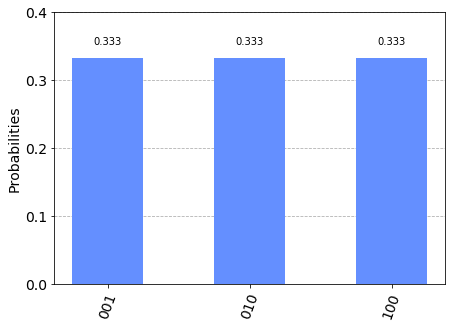

In [4]:
backend = Aer.get_backend('statevector_simulator')
result = execute(w3,backend).result()
counts = result.get_counts()
plot_histogram(counts)